In [1]:
import pandas as pd
from siuba import *

tuition_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')

tuition_income = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv') 

salary_potential = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv')

historical_tuition = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv')

diversity_school = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv')


## Inspect tuition cost data

In [2]:
tuition_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2973 non-null   object 
 1   state                 2921 non-null   object 
 2   state_code            2973 non-null   object 
 3   type                  2973 non-null   object 
 4   degree_length         2973 non-null   object 
 5   room_and_board        1879 non-null   float64
 6   in_state_tuition      2973 non-null   int64  
 7   in_state_total        2973 non-null   int64  
 8   out_of_state_tuition  2973 non-null   int64  
 9   out_of_state_total    2973 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 232.4+ KB


In [3]:
tuition_cost >> count(_.name, _.state) >> filter(_.n > 1)

#tuition_cost >> filter(_.name == "Columbia College")

,name,state,n


### What is the equivalent of glimpse in python?

In [4]:
tuition_income.head().T

,0,1,2,3,4
name,Piedmont International University,Piedmont International University,Piedmont International University,Piedmont International University,Piedmont International University
state,NC,NC,NC,NC,NC
total_price,20174,20174,20174,20174,20514
year,2016,2016,2016,2016,2017
campus,On Campus,On Campus,On Campus,On Campus,On Campus
net_cost,11475,11451,16229,15592,11668.4
income_lvl,"0 to 30,000","30,001 to 48,000","48_001 to 75,000","75,001 to 110,000","0 to 30,000"


## Examining tuition income

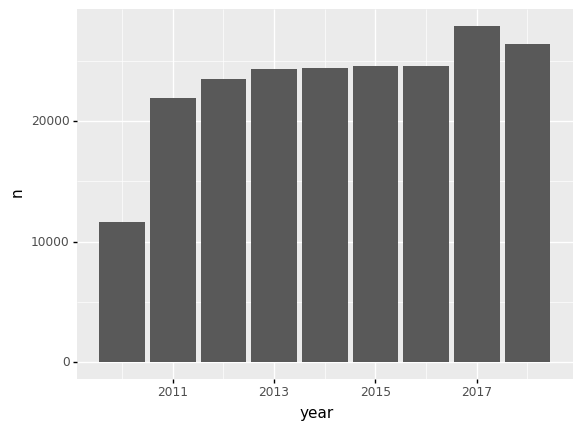

<ggplot: (8742035461988)>

In [5]:
from plotnine import *

(tuition_income >> count(_.year) >> ggplot(aes("year", "n")) + geom_col())

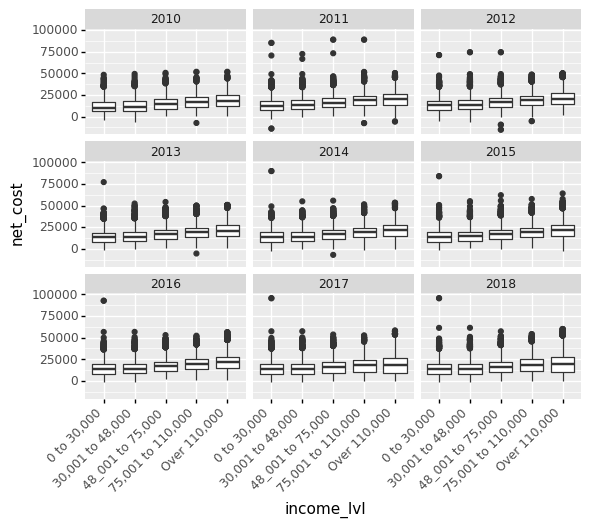

<ggplot: (8742035435334)>

In [6]:
(
    tuition_income
    >> ggplot(aes("income_lvl", "net_cost", "year"))
    + geom_boxplot()
    + facet_wrap("~year")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

## Does a college you pay more to go to, get you more salary?

Some colleges charge the same amount both in and out of state.

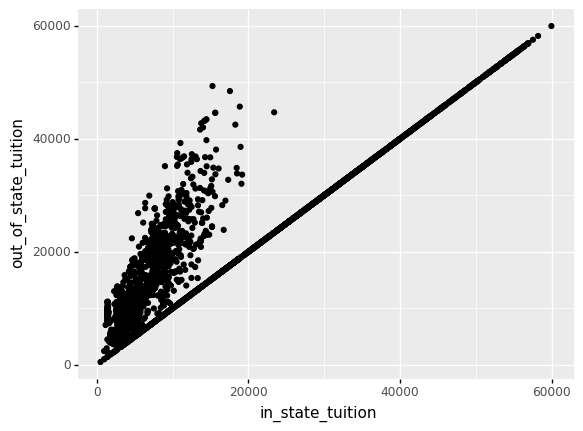

<ggplot: (8742035435394)>

In [7]:
tuition_cost >> ggplot(aes("in_state_tuition", "out_of_state_tuition")) + geom_point()

In [8]:
tuition_cost >> count(_.type, no_in_state = _.in_state_tuition == _.out_of_state_tuition)

,type,no_in_state,n
0,For Profit,True,107
1,Other,False,1
2,Private,False,1
3,Private,True,1280
4,Public,False,1479
5,Public,True,105


In [9]:
tuition_cost >> select(_.name, _.state, _.endswith("state_tuition"))

,name,state,in_state_tuition,out_of_state_tuition
0,Aaniiih Nakoda College,Montana,2380,2380
1,Abilene Christian University,Texas,34850,34850
2,Abraham Baldwin Agricultural College,Georgia,4128,12550
3,Academy College,Minnesota,17661,17661
4,Academy of Art University,California,27810,27810
...,...,...,...,...
2968,York Technical College,South Carolina,5740,12190
2969,Young Harris College,Georgia,29117,29117
2970,Youngstown State University,Ohio,8950,14950
2971,Yuba College,California,1400,8420


In [10]:
costs_and_salary = (
    tuition_cost
    >> select(_.name, _.state, _.type, _.endswith("state_tuition"))
    >> inner_join(_, salary_potential >> rename(state=_.state_name), ["name", "state"])
)

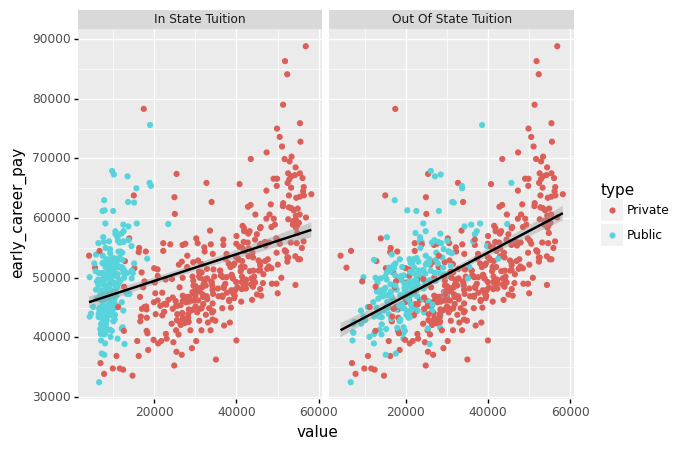

<ggplot: (8742032924910)>

In [11]:
(
    costs_and_salary
    >> select(_.name, _.type, _.endswith("state_tuition"), _.early_career_pay)
    >> gather("metric", "value", -_["type", "name", "early_career_pay"])
    >> mutate(metric=_.metric.str.replace("_", " ").str.title())
    >> ggplot(aes("value", "early_career_pay"))
    + geom_point(aes(color = "type"))
    + facet_wrap("~metric")
    + geom_smooth(method="lm")
)

Roughly 1 dollar increase out of state tuition is 50 cents increase early career pay.

### Low in state tuition, but high pay schools

In [12]:
costs_and_salary >> filter(_.in_state_tuition < 20000, _.early_career_pay > 65000)

,name,state,type,in_state_tuition,out_of_state_tuition,rank,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
81,Charles R Drew University of Medicine and Science,California,Private,17440,17440,5,78300,135700,NaN,3
102,Colorado School of Mines,Colorado,Public,18964,38584,1,75600,139600,60.0,93
242,Maine Maritime Academy,Maine,Public,13478,27098,1,67000,121800,65.0,48
253,Massachusetts Maritime Academy,Massachusetts,Public,9724,26102,8,67900,117500,53.0,47
282,Missouri University of Science and Technology,Missouri,Public,10169,28499,1,67300,122600,50.0,80
330,Oregon Health & Science University,Oregon,Public,19176,33666,1,65400,108300,79.0,10
547,Virginia Military Institute,Virginia,Public,18862,45706,2,65900,120600,68.0,47


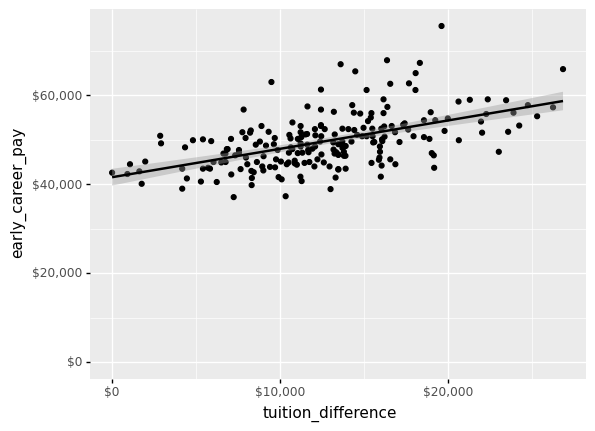

<ggplot: (8742032762076)>

In [13]:
dollar_format = lambda x: list(map('${:,.0f}'.format, x))

(costs_and_salary
  >> select(_.name, _.type, _.endswith("state_tuition"), _.early_career_pay)
  >> mutate(tuition_difference = _.out_of_state_tuition - _.in_state_tuition)
  >> filter(_.tuition_difference != 0)
  >> ggplot(aes("tuition_difference", "early_career_pay")) + geom_point() +
   expand_limits(y = 0)
   + geom_smooth(method = "lm")
   + scale_x_continuous(labels = dollar_format)
   + scale_y_continuous(labels = dollar_format)
)

In [14]:
dollar_format([1000.001])

['$1,000']